In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
data=pd.read_csv("housing.csv")
data.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [4]:
from sklearn.model_selection import train_test_split
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
train_data=X_train.join(y_train)
#train_data.ocean_proximity.value_counts()
#train_data=train_data.drop(['ocean_proximity'],axis=1)
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13802,-117.61,34.34,18.0,5210.0,912.0,1301.0,464.0,4.8623,INLAND
7332,-118.18,33.97,30.0,2887.0,866.0,2806.0,830.0,2.2122,<1H OCEAN
5516,-118.39,33.97,38.0,993.0,175.0,374.0,180.0,6.2673,<1H OCEAN
17420,-120.46,34.64,16.0,686.0,217.0,614.0,200.0,0.8106,NEAR OCEAN
16670,-120.52,35.24,5.0,4413.0,804.0,2003.0,725.0,5.0267,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
18396,-121.77,37.23,15.0,4713.0,769.0,2519.0,778.0,5.6958,<1H OCEAN
8004,-118.10,33.85,28.0,2825.0,470.0,1352.0,469.0,5.2639,<1H OCEAN
4253,-118.35,34.10,18.0,7432.0,2793.0,3596.0,2270.0,2.8036,<1H OCEAN
7774,-118.08,33.91,30.0,1366.0,460.0,920.0,410.0,0.9946,<1H OCEAN


<Axes: >

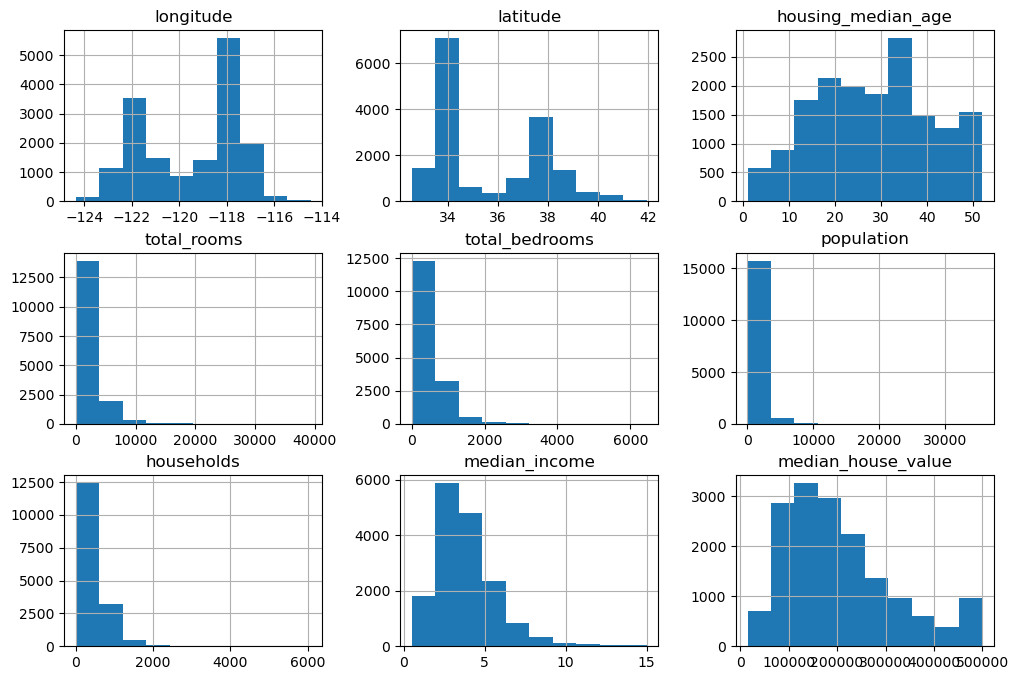

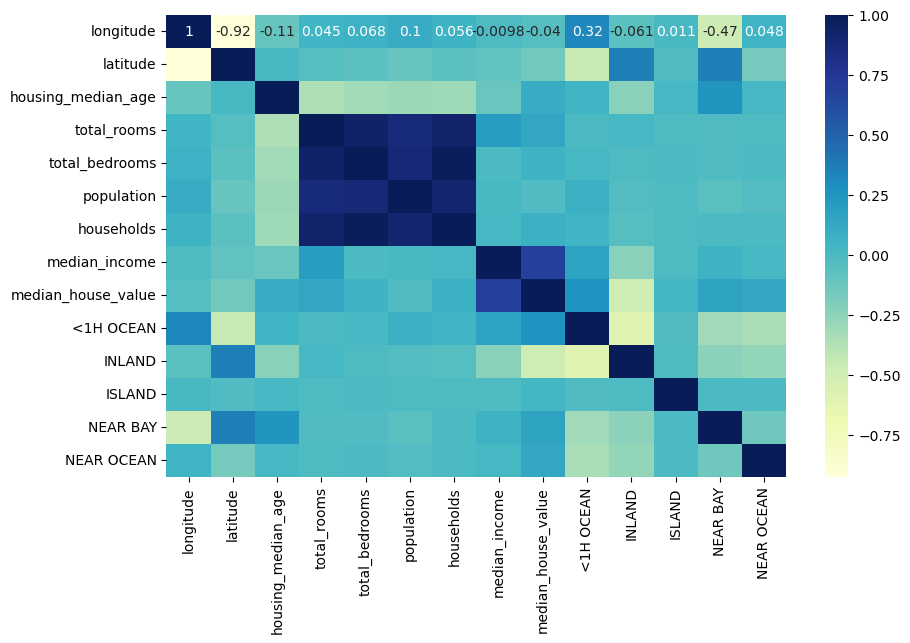

In [5]:
X_train,y_test=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

train_data.hist(figsize=(12,8))
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')


<Axes: xlabel='latitude', ylabel='longitude'>

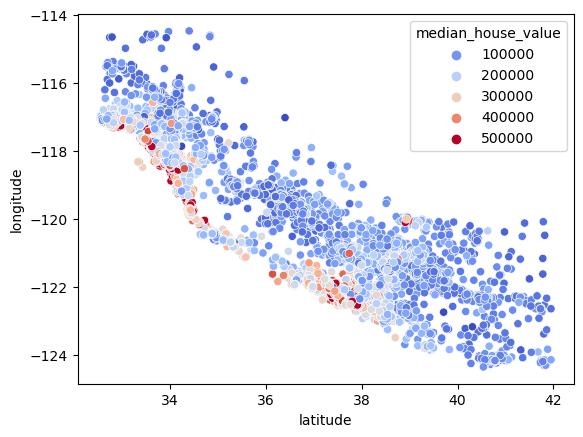

In [6]:
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [7]:
data=pd.read_csv("solubility.csv")
from sklearn.model_selection import train_test_split
X=data.drop(['logS'],axis=1)
y=data['logS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0,0.000000
1,2.37650,133.405,0,0.000000
2,2.59380,167.850,1,0.000000
3,2.02890,133.405,1,0.000000
4,2.91890,187.375,1,0.000000
...,...,...,...,...
1139,1.98820,287.343,8,0.000000
1140,3.42130,286.114,2,0.333333
1141,3.60960,308.333,4,0.695652
1142,2.56214,354.815,3,0.521739


In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)
y_lr_test_pred

array([ -6.49512494,  -1.72076725,   0.23336743,  -1.22296363,
        -3.03433126,  -1.54914325,  -5.03148449,  -7.83140436,
        -2.27503325,  -2.2873722 ,  -0.43251063,  -4.12304519,
        -4.59134093,  -3.06215577,  -5.03549181,  -4.04944733,
        -3.17752201,  -5.13830564,  -0.11295607,  -2.54017562,
        -2.2751579 ,  -2.2751579 ,  -2.4309365 ,  -2.34786015,
        -3.93165177,  -2.56489478,  -4.6965907 ,  -3.03446255,
        -4.0501185 , -10.65504532,  -2.96771413,  -2.64141799,
        -2.10687133,  -5.35475898,  -0.8963211 ,   0.33504544,
        -2.06505549,  -3.93216946,  -4.82448396,  -2.77060209,
        -2.34995589,  -0.49906016,  -3.84157906,  -2.30532191,
        -4.15013978,  -2.08063581,  -4.3633159 ,  -3.14944738,
        -2.5713949 ,  -2.70713078,  -2.69223244,  -2.84477642,
        -3.68622655,  -2.30815128,  -3.53681123,  -2.59311571,
        -0.22827082,  -4.40209893,  -4.59506206,  -1.58979605,
        -5.72912595,  -1.33190631,  -1.13080196,  -3.20

In [10]:
from sklearn.metrics import mean_squared_error,r2_score
y_train_mse=mean_squared_error(y_train,y_lr_train_pred)
y_train_r2=r2_score(y_train,y_lr_train_pred)
y_test_mse=mean_squared_error(y_test,y_lr_test_pred)
y_test_r2=r2_score(y_test,y_lr_test_pred)

In [11]:
lr_results=pd.DataFrame(['moleprediction',y_train_mse,y_train_r2,y_test_mse,y_test_r2]).transpose()
lr_results.columns=(['method','mse','r2train','msetest','r2test'])
lr_results

,method,mse,r2train,msetest,r2test
0,moleprediction,1.058158,0.762635,0.820646,0.801079


In [12]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2)
rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=2)

In [13]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score
y_train_mse=mean_squared_error(y_train,y_rf_train_pred)
y_train_r2=r2_score(y_train,y_rf_train_pred)
y_test_mse=mean_squared_error(y_test,y_rf_test_pred)
y_test_r2=r2_score(y_test,y_rf_test_pred)

In [15]:
rf_results=pd.DataFrame(['moleprediction',y_train_mse,y_train_r2,y_test_mse,y_test_r2]).transpose()
rf_results.columns=(['method','mse','r2train','msetest','r2test'])
rf_results

,method,mse,r2train,msetest,r2test
0,moleprediction,1.038925,0.76695,1.141188,0.723382


In [16]:
df_model=pd.concat([lr_results,rf_results],axis=0)
df_model

,method,mse,r2train,msetest,r2test
0,moleprediction,1.058158,0.762635,0.820646,0.801079
0,moleprediction,1.038925,0.76695,1.141188,0.723382


In [17]:
df_model.reset_index(drop=True)

,method,mse,r2train,msetest,r2test
0,moleprediction,1.058158,0.762635,0.820646,0.801079
1,moleprediction,1.038925,0.76695,1.141188,0.723382


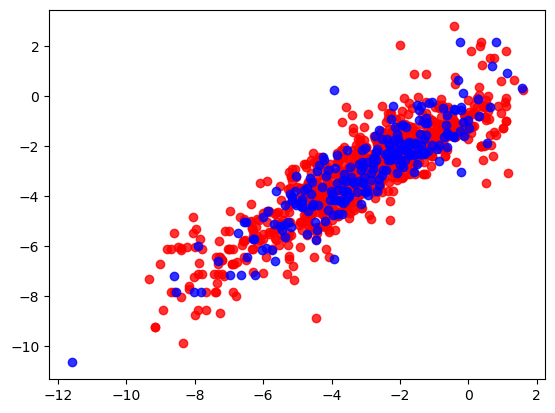

In [18]:
plt.scatter(x=y_train,y=y_lr_train_pred,color='r',alpha=0.8)
#plt.style.use('dark_background')
plt.plot()
plt.scatter(x=y_test,y=y_lr_test_pred,color='b',alpha=0.8)
plt.plot()
plt.style.use('dark_background')

In [19]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [20]:
load=sns.load_dataset('car_crashes')
load.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


C:\Users\visha\AppData\Local\Temp\ipykernel_17576\1465732366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(load['not_distracted'],color='w',bins=25)
C:\Users\visha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'seaborn' has no attribute 'show'

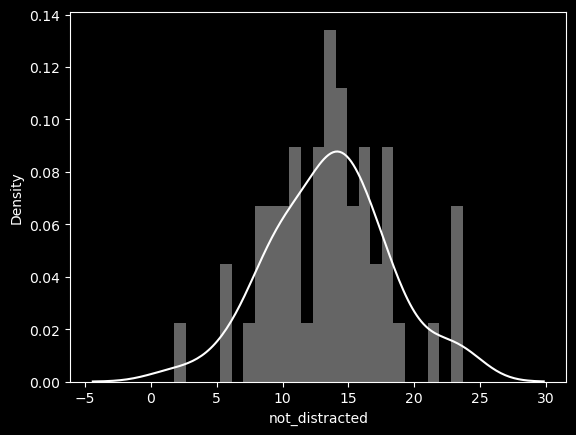

In [21]:

sns.distplot(load['not_distracted'],color='w',bins=25)
sns.show()

In [ ]:
load.head()
loadd=load.drop(['abbrev'],axis=1)
loadd
loading=loadd.corr()
sns.set_context('talk',font_scale=0.5)
sns.heatmap(loading,annot=True)

In [ ]:
sns.set_style('dark')
sns.jointplot(x='speeding',y='alcohol',data=load,kind='reg')
#sns.set_style('dark')
#plt.figure(figsize=(105,20))

In [ ]:
sns.pairplot(load)

In [ ]:
data2=sns.load_dataset('tips')
sns.pairplot(data2,hue='sex',palette='Blues')
sns.set_context('poster',font_scale=2.4)

In [ ]:
sns.rugplot(data2['tip'])

In [ ]:
sns.stripplot

In [33]:
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


NameError: name 'x_train' is not defined

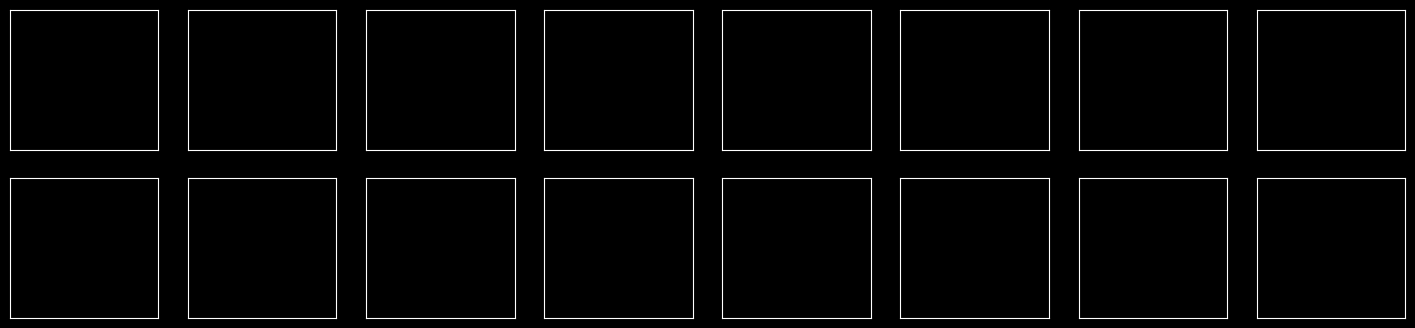

In [34]:
img_per_row = 8
fig,ax = plt.subplots(nrows=2, ncols=img_per_row,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
for row in [0, 1]:
    for col in range(img_per_row):
        ax[row, col].imshow(x_train[row*img_per_row + col].astype('int'))   
plt.show()

In [37]:
fmri=sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


C:\Users\visha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

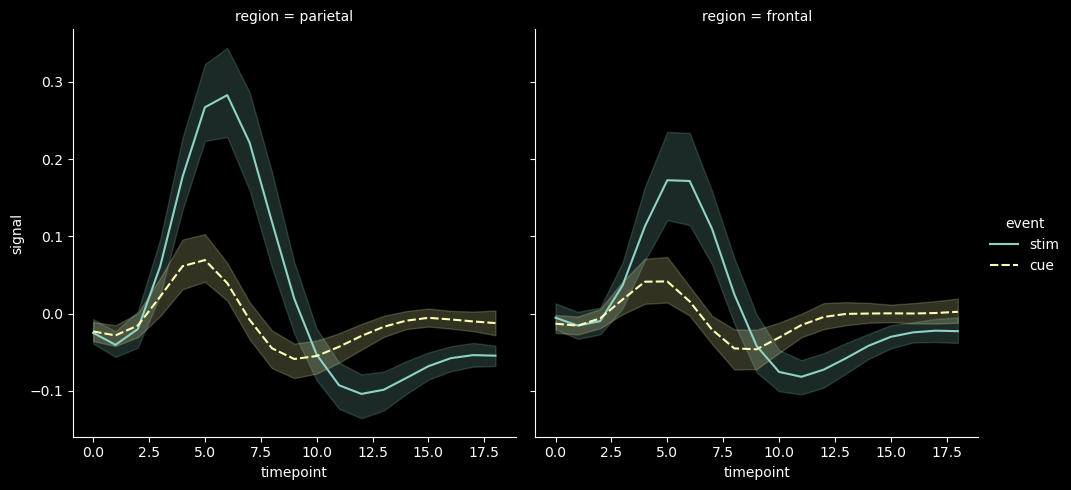

In [55]:
sns.relplot(data=fmri,y="signal",x="timepoint",hue='event',kind='line',col='region',style='event')
plt.show()